In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('sales_data_sample.csv',encoding='Latin1')

In [31]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [33]:
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])

In [34]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [35]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
   
df['DEALSIZE']= label_encoder.fit_transform(df['DEALSIZE']) 
  
df['DEALSIZE'].unique() 

array([2, 1, 0])

In [36]:
df['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [37]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['STATUS']= label_encoder.fit_transform(df['STATUS']) 
  
df['STATUS'].unique() 

array([5, 1, 2, 0, 3, 4])

In [38]:
to_drop=['CUSTOMERNAME','PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','COUNTRY','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','PRODUCTLINE']
df=df.drop(to_drop,axis=1)

In [41]:
to_drop=['PRODUCTCODE']
df=df.drop(to_drop,axis=1)

In [45]:
to_drop=['POSTALCODE']
df=df.drop(to_drop,axis=1)

In [46]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,5,1,2,2003,95,2
1,10121,34,81.35,5,2765.90,2003-05-07,5,2,5,2003,95,2
2,10134,41,94.74,2,3884.34,2003-07-01,5,3,7,2003,95,1
3,10145,45,83.26,6,3746.70,2003-08-25,5,3,8,2003,95,1
4,10159,49,100.00,14,5205.27,2003-10-10,5,4,10,2003,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,5,4,12,2004,54,2
2819,10373,29,100.00,1,3978.51,2005-01-31,5,1,1,2005,54,1
2820,10386,43,100.00,4,5417.57,2005-03-01,4,1,3,2005,54,1
2821,10397,34,62.24,1,2116.16,2005-03-28,5,1,3,2005,54,2


<Axes: >

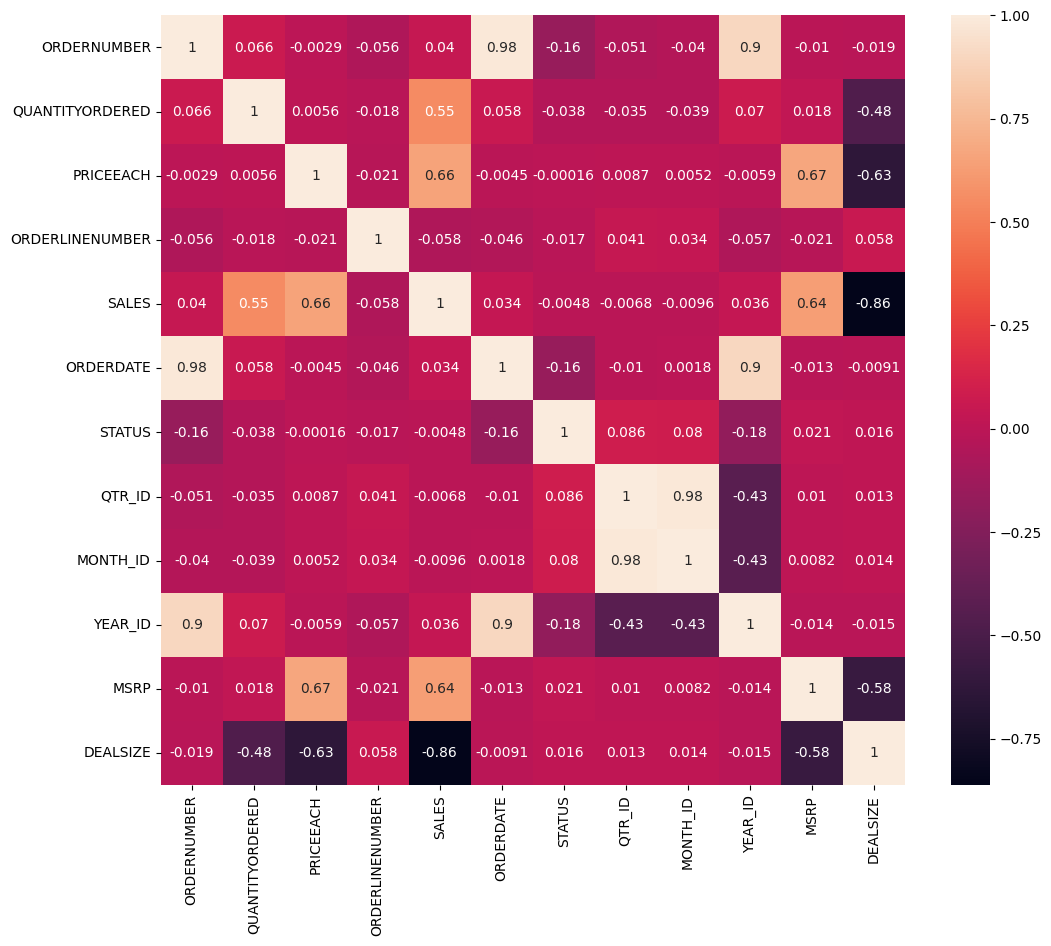

In [47]:
import seaborn as sns
fig = plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

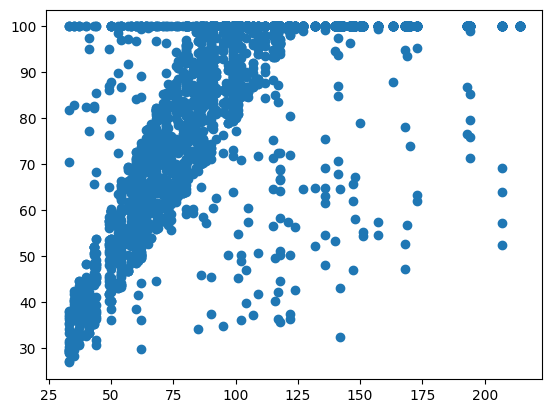

In [48]:
#HIGHEST CORRELATION IS BETWEEN MSRP AND PRICEEACH
plt.scatter(df['MSRP'], df['PRICEEACH'])
plt.show()

In [50]:
data=df[['MSRP','PRICEEACH']]

In [51]:
data

,MSRP,PRICEEACH
0,95,95.70
1,95,81.35
2,95,94.74
3,95,83.26
4,95,100.00
...,...,...
2818,54,100.00
2819,54,100.00
2820,54,100.00
2821,54,62.24


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

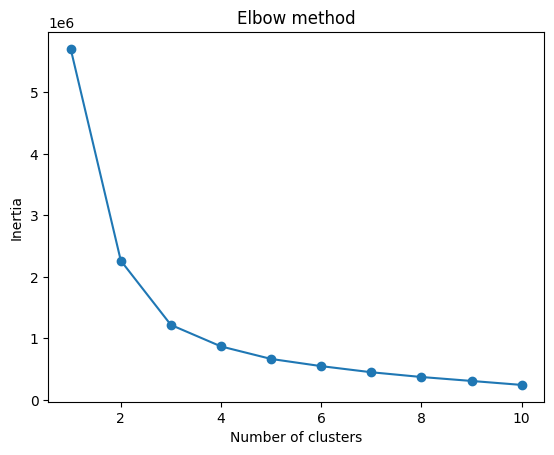

In [52]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


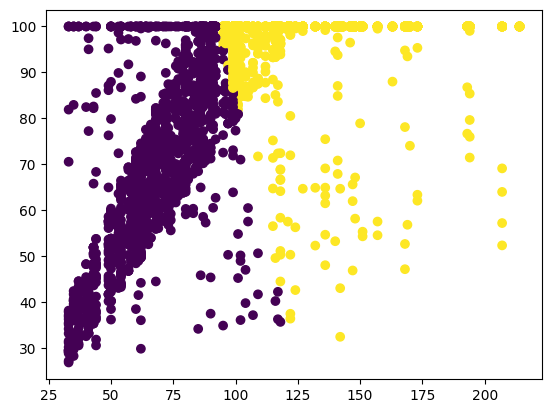

In [55]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(df['MSRP'], df['PRICEEACH'], c=kmeans.labels_)
plt.show()